**1조 김현 - Random Forest**

**data = diabetes**

# 랜덤 포레스트 공부내용

참고 자료
* 혼자 공부하는 머신러닝 + 딥러닝 
* https://youtu.be/Moz8i-tKurk?si=wWoxONSQjvDa4c5Y 
* https://medium.com/dawn-cau/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-%EC%9D%B4%EB%9E%80-cf1fcb97f9d0 

**앙상블 알고리즘**
* 여러 개의 개별 모델을 조합하여 최적의 모델로 일반화하는 방법
* weak classifier -> strong classifier
* 정형데이터를 다루는데 가장 뛰어남
* 종류 : 배깅, 보팅, 부스팅, 스태킹


그중에서 **배깅**은 Bagging = boostrap aggregation인데
* 샘플을 여러번 뽑아서(bootstrap) 각 모델을 학습시킨 다음 결과물을 집계(aggregation)하는 방법.
* 배깅의 예시로 "랜덤 포레스트"가 있음


**랜덤 포레스트**
결정트리를 랜덤하게 만들고 결정트리의 숲을 만듦 -> 각 결정 트리의 예측을 사용해 최종 예측 생성, 과대적합 예방 
트리를 훈련하기 위한 데이터 = 부트스트랩 샘플 (훈련 세트의 크기와 같게 훈련세트에서 데이터를 중복추출함)
전체 특성 개수의 제곱근만큼 특성을 무작위로 고른 후 최선의 분할 선택 

In [25]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [26]:
# 데이터 
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [27]:
# 훈련 세트와 테스트 세트로 나누기 

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [28]:
# cross_validate() 함수를 사용해 교차 검증 
# 교차 검증 = 데이터를 훈련 세트와 테스트 세트로 여러 번 나누어 모델을 평가하는 기법 

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)  # 모든 cpu 코어 사용 ->  실행 속도가 더 빠름 
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) 
# return_train_score : 훈련세트와 검증세트의 점수 모두 반환 -> 과대적합 파악 
# n_jobs : 최대한 병렬로 교차 검증
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# scores

0.9973541965122431 0.8905151032797809


In [29]:
# 특성 중요도 계산

rf.fit(train_input, train_target) # 훈련 세트에 훈련
print(rf.feature_importances_)    # 하나의 특성에 과도하게 집중하지 않고 더 많은 특성이 훈련에 기여할 기회를 줌 -> 과대 적합 줄이고 일반화 성능 높임

[0.23167441 0.50039841 0.26792718]


In [30]:
# 자체적으로 모델 평가
# oob 샘플 (부스트 트랩에 포함되지 않고 남는 샘플)을 검증 세트처럼 사용
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


# diabetes로 랜덤포레스트

In [31]:
# 필요한 라이브러리 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* pregnancies = Number of times pregnant
* glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressur = Diastolic blood pressure (mm Hg) 이완기 혈압
* skinThickness = Triceps skin fold thickness (mm)
* Insulin = 2-Hour serum insulin (mu U/ml)
* bmi = Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function = 
* age
* outcome


In [32]:
data = pd.read_csv("diabetes.csv")

## 데이터 핸들링 

### 데이터 구조

In [33]:
df = data.copy()
df.shape

(768, 9)

In [34]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [35]:
df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [116]:
df.corr()
# Glucose, BMI, Pregnancies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 각 변수 자세히 보기

#### pregnancies

In [39]:
df["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

<Axes: xlabel='Pregnancies'>

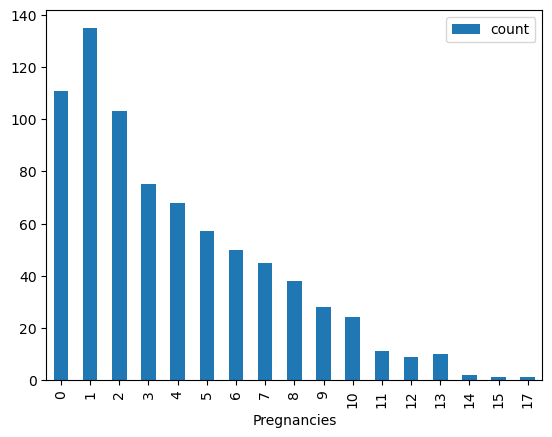

In [52]:
tmp = df["Pregnancies"].value_counts()
tmp = pd.DataFrame(tmp)
tmp = tmp.sort_values("Pregnancies")
tmp.plot.bar()

#### Glucose

In [54]:
df["Glucose"].describe()

# 글루코스가 0인 것????

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<Axes: >

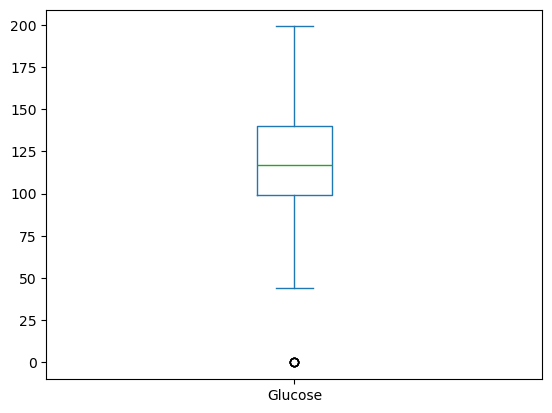

In [55]:
df["Glucose"].plot.box()       # 0은 이상치일 확률이 높음음

In [56]:
df[df["Glucose"] == 0]  
# 5명의 글루코스가 0임. 글루코스가 0인 것은 잘못 측정된 값일 것으로 예상되므로 열을 삭제하는 방법을 고려함.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [120]:
glucose_no_0 = df.copy()
glucose_no_0 = glucose_no_0[glucose_no_0.iloc[:,1] != 0]
glucose_no_0["Glucose"].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

<Axes: >

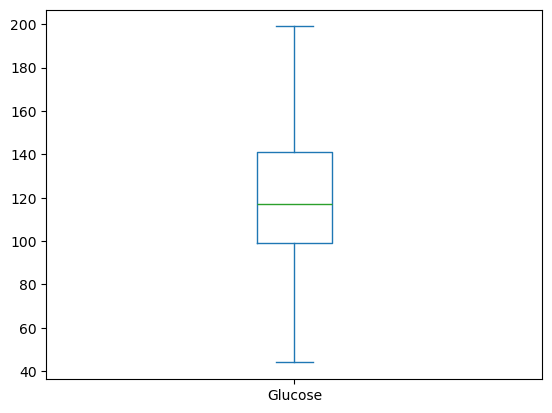

In [122]:
glucose_no_0["Glucose"].plot.box()

#### Blood Pressure

In [57]:
df["BloodPressure"].describe()  #혈압에도 0이 존재함

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<Axes: >

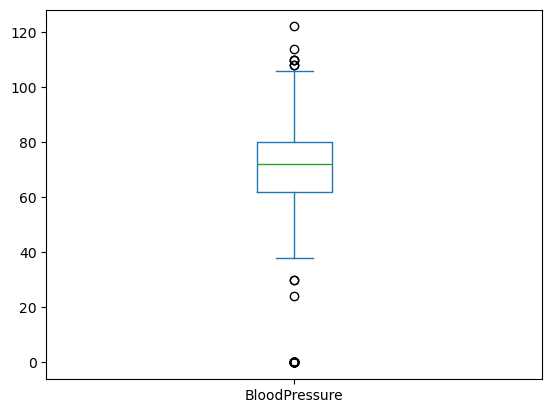

In [ ]:
df["BloodPressure"].plot.box()  #0인 값에 대해서는 조치가 필요해보임 

In [87]:
print(df[df["BloodPressure"] == 0].count())
df[df["BloodPressure"] == 0] 

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [113]:
bp_no_0 = df.copy()
bp_no_0 = bp_no_0[bp_no_0.iloc[:,2]!=0]
bp_no_0["BloodPressure"].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<Axes: >

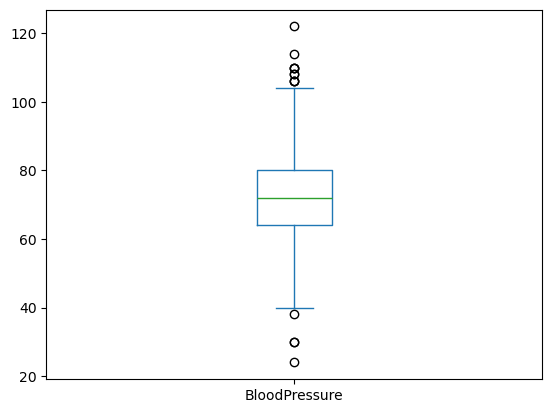

In [115]:
bp_no_0["BloodPressure"].plot.box()

#### skinThickness

In [65]:
df["SkinThickness"].describe()  # 하위 25프로까지 다 0임임

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

<Axes: >

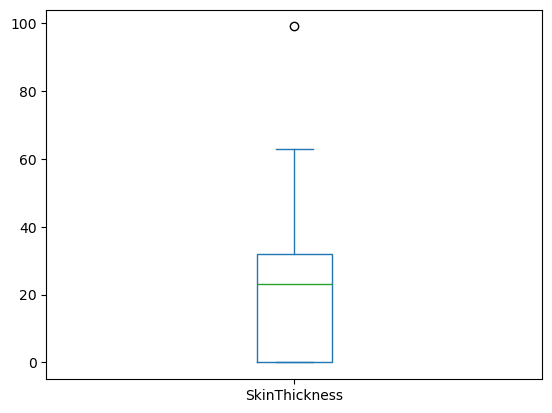

In [66]:
df["SkinThickness"].plot.box() # 0은 정상범위인가? 이상치도 있어 보임

In [67]:
df[df["SkinThickness"] == 99]  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


<Axes: xlabel='SkinThickness'>

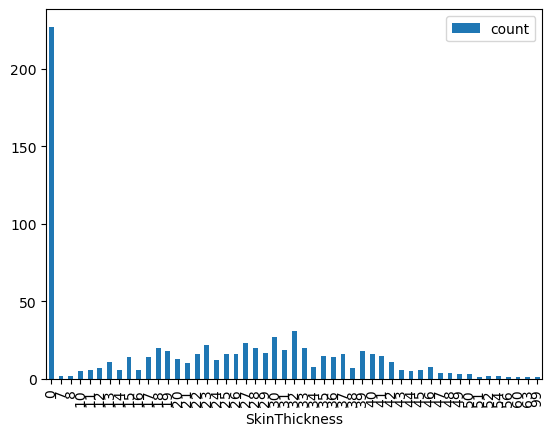

In [92]:
tmp = df["SkinThickness"].value_counts()
tmp = pd.DataFrame(tmp)
tmp.sort_values("SkinThickness").plot.bar()

# 0이 200이상으로 매우 많음. 그렇지만 Triceps skin fold thickness (mm) = 삼두 피부 두께는 0이 될 수 없으므로 평균 대체 등의 처리가 무조건 필요함!

In [104]:
# 0과 99을 제외했을 떄의 plot과 평균 
skin_no_0 = df.copy()
skin_no_0 = skin_no_0[(skin_no_0.iloc[: , 3] != 0) & (skin_no_0.iloc[: , 3] != 99)]
skin_no_0["SkinThickness"].describe()   

# 평균과 median이 큰 차이나지 않음
# 0과 99를 제거하기 전후 차이는 큼
# 0과 99는 "29"로 대체!!!

count    540.000000
mean      29.024074
std       10.045046
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       63.000000
Name: SkinThickness, dtype: float64

<Axes: >

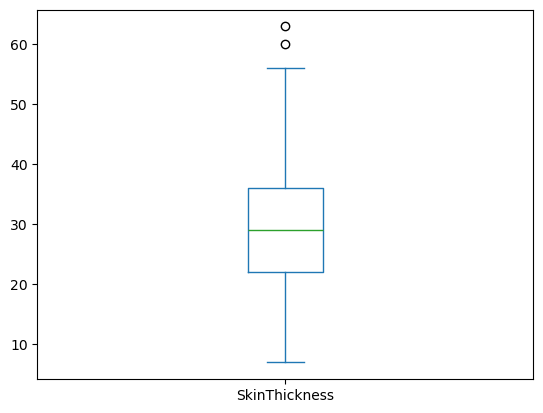

In [105]:
skin_no_0["SkinThickness"].plot.box()

#### Insulin

In [69]:
df["Insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

<Axes: >

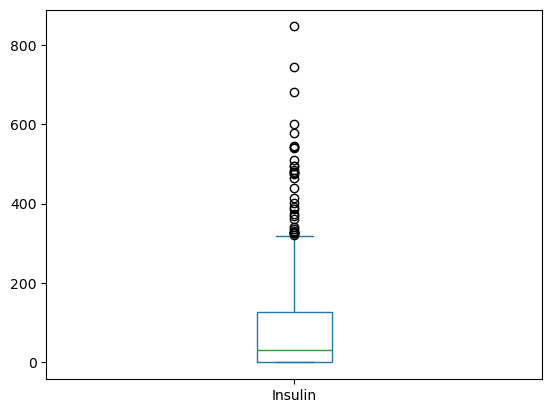

In [70]:
df["Insulin"].plot.box()

# 검색 결과
# A normal 2-hour serum insulin level is between 16 and 166 micro-international units per milliliter (mIU/L).          
# A 2-hour serum insulin level is measured after consuming a glucose solution during a glucose tolerance test. 
# This test is used to screen for prediabetes and type 2 diabetes. 

# https://sev.severance.healthcare/health/encyclopedia/treat_board.do?mode=view&articleNo=67023&title=인슐린 

In [107]:
tmp = df["Insulin"].value_counts()
tmp = pd.DataFrame(tmp)
tmp.sort_values("Insulin")

# 0 이후 바로 1, 2가 아닌 14인 것을 보면 0도 처리가 필요함

,count
Insulin,
0,374
14,1
15,1
16,1
18,2
...,...
579,1
600,1
680,1


In [110]:
insulin_no_0 = df.copy()
insulin_no_0 = insulin_no_0[insulin_no_0.iloc[:,4] !=0]
insulin_no_0["Insulin"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

<Axes: >

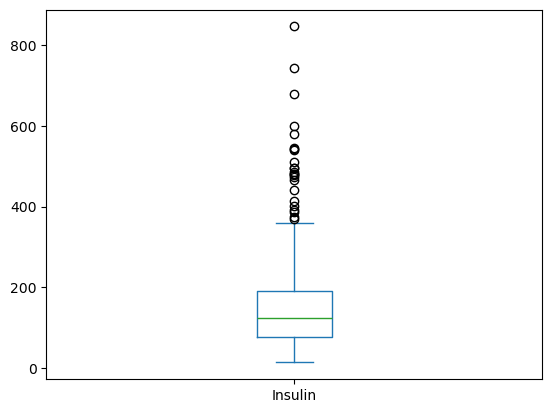

In [111]:
insulin_no_0["Insulin"].plot.box()

# 분포의 비대칭이 있으므로 median으로 0을 대체하기 

#### bmi

In [72]:
df["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

<Axes: >

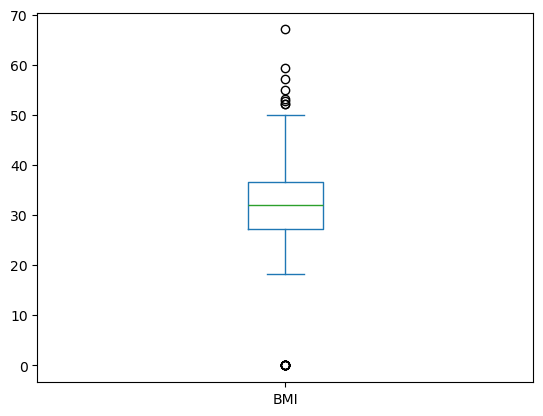

In [73]:
df["BMI"].plot.box()   # bmi가 0인 것은 문제 있음..

In [85]:
print(df[df["BMI"] == 0].count() )
df[df["BMI"] == 0]  # 우선 0인 것은 열을 삭제하는 쪽으로 고려 

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [117]:
bmi_no_0 = df.copy()
bmi_no_0 = bmi_no_0[bmi_no_0.iloc[:,5] != 0]
bmi_no_0["BMI"].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

<Axes: >

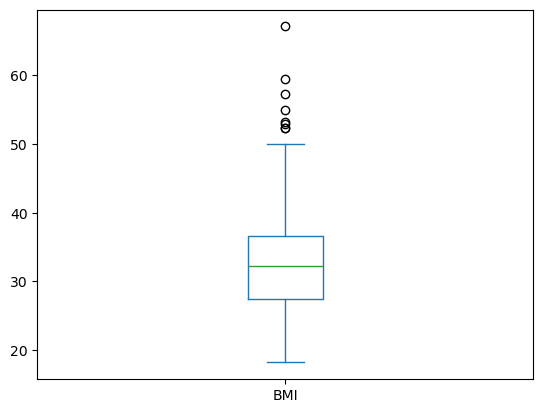

In [118]:
bmi_no_0["BMI"].plot.box()

#### diabetes pedigree function

In [75]:
df["DiabetesPedigreeFunction"].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: >

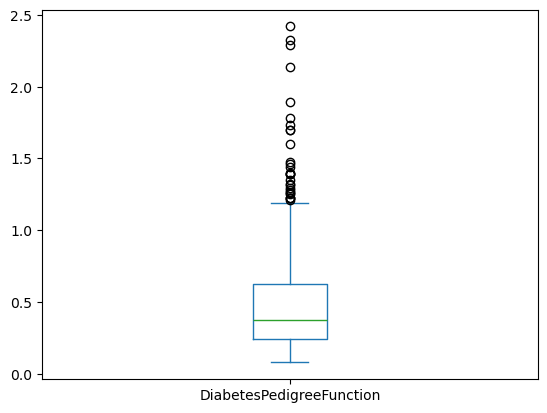

In [76]:
df["DiabetesPedigreeFunction"].plot.box()  

In [77]:
df[df["DiabetesPedigreeFunction"] >= 0.626250]  
#우선 삭제하는 열 없이 pass

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
20,3,126,88,41,235,39.3,0.704,27,0
...,...,...,...,...,...,...,...,...,...
744,13,153,88,37,140,40.6,1.174,39,0
747,1,81,74,41,57,46.3,1.096,32,0
750,4,136,70,0,0,31.2,1.182,22,1
755,1,128,88,39,110,36.5,1.057,37,1


#### age

In [78]:
df["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<Axes: >

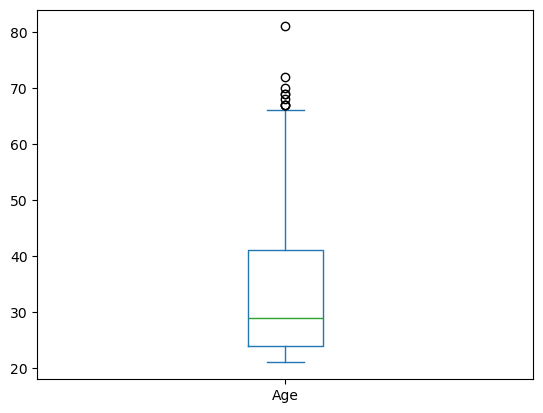

In [79]:
df["Age"].plot.box()

# age도 패스

### 수정해야할 열 판단

* glucose == 0 인 열은 5개            => 평균인 "121.7" 대체 
* bloodpressure == 0 인 열 35개       => 평균인 "72"로 대체
* skinThickness == 0 인 열 200개 이상 => 평균인 "29"로 대체
* skinThickness == 99 인 열 1개       => 평균인 "29"로 대체
* insulin == 0 인 열 374개            => median인 "125"로 대체
* bmi == 0 인 열 11개                 => 평균인 "32"로 대체

이상치로 판단한 열들을 모두 삭제했을 때 데이터의 손실이 너무 크므로 다른 값으로 대체하도록 한다.

### 이상치 대체

In [123]:
# 원본은 data이므로 df에다가 바로 적용

df["Glucose"] = df["Glucose"].replace(0, 121.7)
df["BloodPressure"] = df["BloodPressure"].replace(0,72)
df["SkinThickness"] = df["SkinThickness"].replace(0,29)
df["SkinThickness"] = df["SkinThickness"].replace(99,29)
df["Insulin"] = df["Insulin"].replace(0, 125)
df["BMI"] = df["BMI"].replace(0,32)

In [126]:
# 제대로 replace 됐는지 확인 
df.iloc[75]

Pregnancies                   1.00
Glucose                     121.70
BloodPressure                48.00
SkinThickness                20.00
Insulin                     125.00
BMI                          24.70
DiabetesPedigreeFunction      0.14
Age                          22.00
Outcome                       0.00
Name: 75, dtype: float64

In [129]:
# 원본 데이터와 corr 차이이
data.corr() - df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,0.000000,0.001548,-0.067333,-0.172974,-0.098582,-0.003863,0.000000,0.000000,0.000000
Glucose,0.001548,0.000000,-0.065966,-0.117017,-0.087705,-0.010409,0.000278,-0.003018,-0.026347
BloodPressure,-0.067333,-0.065966,0.000000,0.004897,0.043570,0.000673,0.043643,-0.085387,-0.100655
SkinThickness,-0.172974,-0.117017,0.004897,0.000000,0.272359,-0.171061,0.080616,-0.219122,-0.134781
Insulin,-0.098582,-0.087705,0.043570,0.272359,0.000000,0.017486,0.058568,-0.139264,-0.073242
BMI,-0.003863,-0.010409,0.000673,-0.171061,0.017486,0.000000,-0.012859,0.010497,-0.019554
DiabetesPedigreeFunction,0.000000,0.000278,0.043643,0.080616,0.058568,-0.012859,0.000000,0.000000,0.000000
Age,0.000000,-0.003018,-0.085387,-0.219122,-0.139264,0.010497,0.000000,0.000000,0.000000
Outcome,0.000000,-0.026347,-0.100655,-0.134781,-0.073242,-0.019554,0.000000,0.000000,0.000000


## 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정

In [145]:
input = df.drop(columns="Outcome")
target = df["Outcome"]

## 학습 데이터와 검증 데이터분할

In [147]:
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

## 학습 수행 (Modeling)

In [149]:
rf = RandomForestClassifier(n_jobs=-1)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print("훈련 세트 평균 정확도:", np.mean(scores['train_score']))
print("검증 세트 평균 정확도:", np.mean(scores['test_score']))

훈련 세트 평균 정확도: 1.0
검증 세트 평균 정확도: 0.7687325069972012


In [150]:
# 특성 중요도 계산
rf.fit(train_input, train_target) # 훈련 세트에 훈련
print(rf.feature_importances_)

[0.08570605 0.26145148 0.08387155 0.07005071 0.08065076 0.16185299
 0.11746308 0.13895339]


## 학습된 모델 평가 

In [151]:
# 모델 자체 평가
rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.7866449511400652


In [152]:
from sklearn.metrics import accuracy_score

# 훈련 데이터 예측값
train_pred = rf.predict(train_input) # 학습에 사용한 데이터
# 테스트 데이터 예측값
test_pred = rf.predict(test_input) 

print('학습 정확도 : ', accuracy_score(train_target, train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(test_target, test_pred))

학습 정확도 :  1.0
검증 정확도 :  0.7142857142857143


In [153]:
from sklearn.metrics import classification_report

# 학습 성능 평가가
print(classification_report(train_target, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       201

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [154]:
# 일반화 성능 평가
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        87
           1       0.70      0.60      0.65        67

    accuracy                           0.71       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.71      0.71      0.71       154

